In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


import statsmodels.api as sm
import statsmodels.formula.api as smf

import pickle


Importing 'players_21.csv' as a pandas data dataframe. New column 'value' with stores the market value ('value_eur') in millions.

In [13]:
df= pd.read_csv('players_21.csv')
df['value'] = df['value_eur']/1000000
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,value
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,67.5
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,46.0
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,75.0
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,80.0
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,90.0


**1.2** Show the most valuable player for each position ('team_position'). Display the position, the name ('short_name'), and the market value in millions.

In [23]:
df_posnamval = df[['team_position','short_name','value']]
df_posnamval = df_posnamval.loc[df_posnamval.groupby('team_position')['value'].idxmax()]
df_posnamval.set_index('team_position').head()

,short_name,value
team_position,,
CAM,L. Messi,67.5
CB,M. Hummels,33.0
CDM,Casemiro,59.5
CF,K. Benzema,53.0
CM,I. Fernández,16.5


**1.3** Show the 10 most valuable teams ('club_name')! Display the total market value and the
size of the squad!

In [15]:
df_teams= df[['club_name','short_name','value']].copy()
df_teams['size']=1
# print(df_teams.head())
df_teams = df_teams.groupby(['club_name'])[['value','size']].sum()
df_teams.sort_values(ascending=False,by='value').head(10)

,value,size
club_name,,
Liverpool,840.625,33
Real Madrid,760.850,32
Manchester City,747.275,33
FC Barcelona,722.200,33
FC Bayern München,609.700,22
Paris Saint-Germain,605.675,29
Chelsea,602.275,33
Atlético Madrid,582.500,33
Tottenham Hotspur,571.525,33


Ploting the minium, the mean and the maximum value for each overall player strength group.


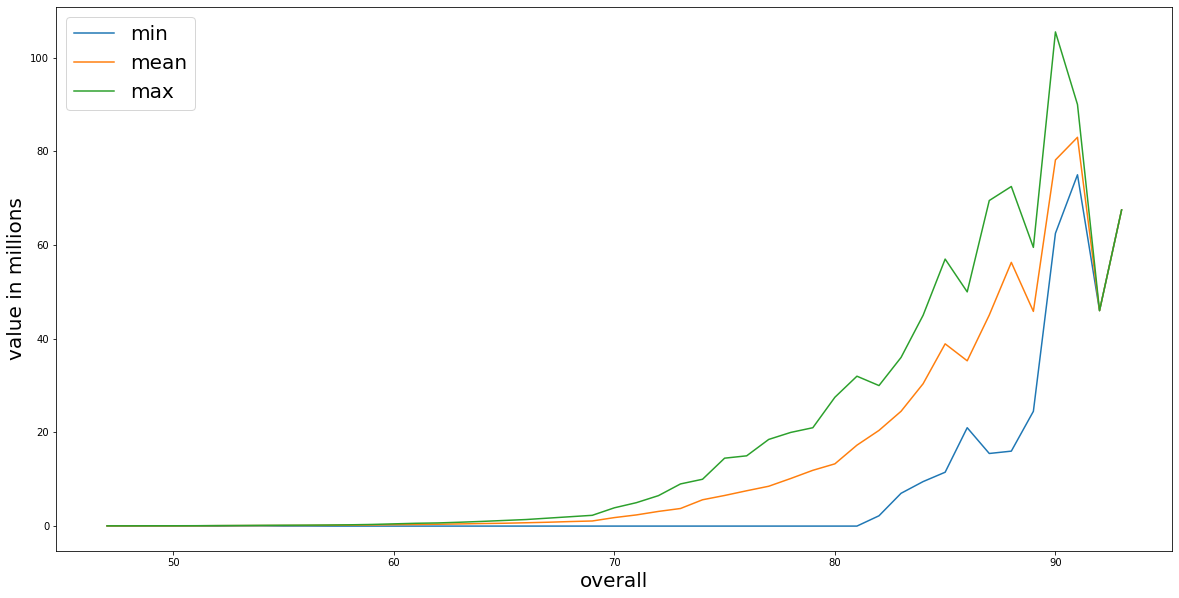

In [16]:
##players with strength
#uncomment if you want to choose the players only who has strength tag
# df_strength = df.loc[df['player_tags'].str.contains("#Strength",case=False,na=False)]
df_strength = df.copy()

#min group
df_strength_min = df_strength.groupby('overall')['value'].min()

#max group
df_strength_max = df_strength.groupby('overall')['value'].max()

#average value group
df_strength_mean = df_strength.groupby('overall')['value'].mean()

#plotting
df_strength_min.plot(label='min', figsize=(20, 10))

df_strength_mean.plot(label='mean', figsize=(20, 10))
df_strength_max.plot(label='max', figsize=(20, 10))

plt.xlabel('overall', fontsize=20)
plt.ylabel('value in millions', fontsize=20)
plt.legend(fontsize=20)
plt.show()

## 2. Regression

Deleteing  all players where the value is zero.

In [19]:
regDf = df.copy()

df_nonzero_valued_players = regDf[regDf['value'] != 0]
df_nonzero_valued_players.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,value
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,67.5
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,46.0
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,75.0
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,80.0
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,90.0


***2.2*** Regress the logarithmic player value on the overall strength and potential of the player.  Which player is the most overvalued (highest residual value)?

***2.3*** Create dummies for the player positions. Note that several positions are possible per player.

In [20]:
# positions=set()
# for pos in df['player_positions']:
#     positions.update(pos.split(', '))
# print(positions)
    
newDf = df_nonzero_valued_players.copy()

targetDf = newDf[['short_name', 'age','weight_kg', 'height_cm', 'value', 'player_positions']]
targetDf.head()

#converting values into log
targetDf = targetDf.assign(value_log = np.log(targetDf.value))

# targetDf.columns()
#create dummy coding
#After do some R&D from internet I followed a solution from stackoverflow, for me I think this is shorter way
#link: https://datascience.stackexchange.com/questions/14847/multiple-categorical-values-for-a-single-feature-how-to-convert-them-to-binary-u
cleaned = targetDf.set_index('short_name').player_positions.str.split(', ', expand=True).stack()
playersDc = pd.get_dummies(cleaned).groupby(level=0).sum()

# 
#merge
mergeDf = pd.merge(targetDf, playersDc, on="short_name")
mergeDf.head()

,short_name,age,weight_kg,height_cm,value,player_positions,value_log,CAM,CB,CDM,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,L. Messi,33,72,170,67.5,"RW, ST, CF",4.212128,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,Cristiano Ronaldo,35,83,187,46.0,"ST, LW",3.828641,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,J. Oblak,27,87,188,75.0,GK,4.317488,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,R. Lewandowski,31,80,184,80.0,ST,4.382027,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Neymar Jr,28,68,175,90.0,"LW, CAM",4.499810,1,0,0,...,0,0,0,1,0,0,0,0,0,0


***2.4*** Regress the logarithmic player value on age, the squared age, Body-Mass-Index and, the player position dummies. Hint: The BMI is ``weight / height**2``.

***2.5*** Use the same model as in the last task. Now estimate all possible models in which you omit one explanatory variable. Which has the highest and lowest influence on the R Squared?

In [21]:
r2_dict={}
log_reg_player1 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB + LM + LW + LWB + RB + RM+ RW + RWB + ST", 
                         data=playersDf22).fit()

log_reg_player2 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB + LM + LW + LWB + RB + RM+ RW + RWB", 
                         data=playersDf22).fit()

log_reg_player3 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB + LM + LW + LWB + RB + RM+ RW", 
                         data=playersDf22).fit()

log_reg_player4 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB + LM + LW + LWB + RB + RM", 
                         data=playersDf22).fit()

log_reg_player5 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB + LM + LW + LWB + RB", 
                         data=playersDf22).fit()


log_reg_player6 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB + LM + LW + LWB", 
                         data=playersDf22).fit()

log_reg_player7 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB + LM + LW", 
                         data=playersDf22).fit()

log_reg_player8 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB + LM", 
                         data=playersDf22).fit()


log_reg_player8 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK + LB", 
                         data=playersDf22).fit()


log_reg_player9 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM + GK", 
                         data=playersDf22).fit()



log_reg_player10 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF + CM", 
                         data=playersDf22).fit()



log_reg_player11 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM + CF", 
                         data=playersDf22).fit()

log_reg_player12 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB + CDM", 
                         data=playersDf22).fit()


log_reg_player13 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM + CB", 
                         data=playersDf22).fit()



log_reg_player14 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2 + CAM", 
                         data=playersDf22).fit()


log_reg_player15 = smf.ols("value_log ~ age + age**2 + weight_kg/height_cm**2", 
                         data=playersDf22).fit()




log_reg_player15 = smf.ols("value_log ~ age + age**2", 
                         data=playersDf22).fit()


log_reg_player16 = smf.ols("value_log ~ age", 
                         data=playersDf22).fit()

r2_dict={
            'log_reg_player1': log_reg_player1.rsquared,
            'log_reg_player2': log_reg_player2.rsquared,
            'log_reg_player3': log_reg_player3.rsquared,
            'log_reg_player4': log_reg_player4.rsquared,
            'log_reg_player5': log_reg_player5.rsquared,
            'log_reg_player6': log_reg_player6.rsquared,
            'log_reg_player7': log_reg_player7.rsquared,
            'log_reg_player8': log_reg_player8.rsquared,
            'log_reg_player9': log_reg_player9.rsquared,
            'log_reg_player10': log_reg_player10.rsquared,
            'log_reg_player11': log_reg_player11.rsquared,
            'log_reg_player12': log_reg_player12.rsquared,
            'log_reg_player13': log_reg_player13.rsquared,
            'log_reg_player14': log_reg_player14.rsquared,
            'log_reg_player15': log_reg_player15.rsquared,
            'log_reg_player16': log_reg_player16.rsquared
        }

print(pd.Series(r2_dict).sort_values(ascending=False))

log_reg_player1     0.093354
log_reg_player2     0.092613
log_reg_player3     0.092430
log_reg_player4     0.091242
log_reg_player5     0.089058
log_reg_player6     0.088257
log_reg_player7     0.088188
log_reg_player8     0.078835
log_reg_player9     0.078197
log_reg_player10    0.057051
log_reg_player11    0.057043
log_reg_player12    0.053781
log_reg_player13    0.052072
log_reg_player14    0.051222
log_reg_player15    0.040345
log_reg_player16    0.040345
dtype: float64


In [22]:
# From the above scores, we can determined that log_reg_player1 got the highest rSquare value, And log_reg_player16 got the 
# lowest rSquare value. Because log_reg_player1 its more complex than other models. One of the reason is it got more feature
# variables compared to other models. And log_reg_player16 got only one feature. This model has a chance of underfitting.

In [25]:
df_posnamval = df[['team_position','short_name','potential','value']]
df_posnamval = df_posnamval.loc[df_posnamval.groupby('team_position')['value'].idxmax()]
df_posnamval.set_index('team_position').head()

,short_name,potential,value
team_position,,,
CAM,L. Messi,93,67.5
CB,M. Hummels,86,33.0
CDM,Casemiro,89,59.5
CF,K. Benzema,89,53.0
CM,I. Fernández,81,16.5
